CLEANING START


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [42]:
#Create dataframe
df = pd.read_excel('485.xlsx',engine='openpyxl')


In [43]:
print(df.columns)

Index(['LocationID', 'COUNTY', 'ROUTE', 'LOCATION', 'AADT_2002', 'AADT_2003',
       'AADT_2004', 'AADT_2005', 'AADT_2006', 'AADT_2007', 'AADT_2008',
       'AADT_2009', 'AADT_2010', 'AADT_2011', 'AADT_2012', 'AADT_2013',
       'AADT_2014', 'AADT_2015', 'AADT_2016', 'AADT_2017', 'AADT_2018',
       'AADT_2019', 'AADT_2020', 'AADT_2021', 'AADT_2022', 'AADT_2023'],
      dtype='object')


In [44]:
#Check If there is any missing value in the dataset
missing_values = df.isna().sum()
print(missing_values)

LocationID    0
COUNTY        0
ROUTE         0
LOCATION      0
AADT_2002     0
AADT_2003     0
AADT_2004     0
AADT_2005     0
AADT_2006     0
AADT_2007     0
AADT_2008     0
AADT_2009     0
AADT_2010     0
AADT_2011     0
AADT_2012     0
AADT_2013     0
AADT_2014     0
AADT_2015     0
AADT_2016     0
AADT_2017     0
AADT_2018     0
AADT_2019     0
AADT_2020     0
AADT_2021     0
AADT_2022     0
AADT_2023     0
dtype: int64


In [45]:
#Create new data frame with only the columns that 
value_columns = ['AADT_2002', 'AADT_2003',
       'AADT_2004', 'AADT_2005', 'AADT_2006', 'AADT_2007', 'AADT_2008',
       'AADT_2009', 'AADT_2010', 'AADT_2011', 'AADT_2012', 'AADT_2013',
       'AADT_2014', 'AADT_2015', 'AADT_2016', 'AADT_2017', 'AADT_2018',
       'AADT_2019', 'AADT_2020', 'AADT_2021', 'AADT_2022', 'AADT_2023']


In [46]:
#Convert the columns to numeric
df_value = df[value_columns].apply(pd.to_numeric, errors="coerce")


In [47]:
#Fill missing values with mean or median
#If skewness is less than or equal to 0.5, fill missing values with mean
#else fill missing values with median
for column in df_value.columns:
    if abs(df_value[column].skew()) <= 0.5:
        df_value[column] = df_value[column].fillna(df_value[column].mean())
    else:
        df_value[column] = df_value[column].fillna(df_value[column].median())
        

In [48]:
#Done cleaning data and make it an csv file
df[value_columns] = df_value
df[value_columns].describe()
df.to_csv('485_cleaned.csv', index=False)

CLEANING END

PLOTTING



In [53]:
#Calculate the mean and median of the dataset
average = df_value.mean()
median = df_value.median()
year = list(range(2002,2024))
location = df['LOCATION']


LINE PLOT (TRENDING OVER TIME)

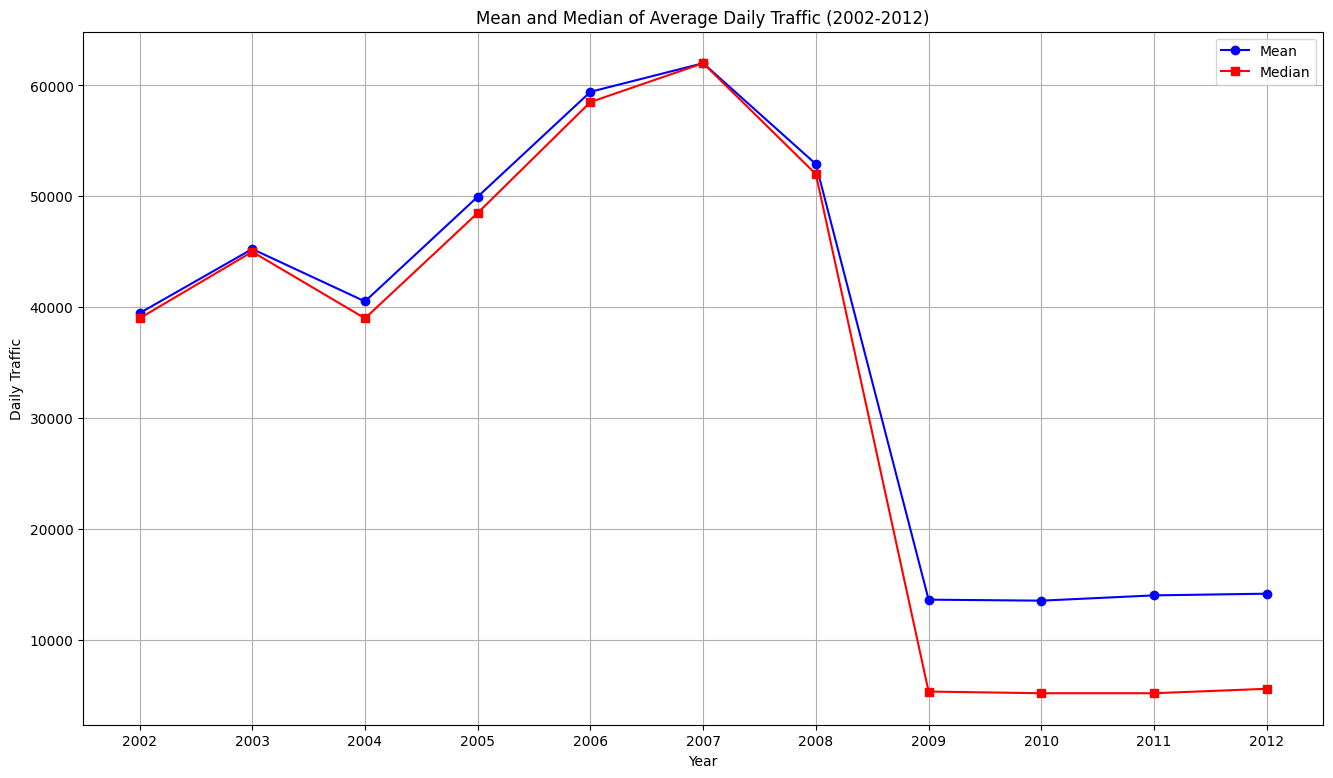

In [50]:

#Plot the mean and median (First half)
plt.figure(figsize=(16,9))
plt.plot(year[:11], average[:11], label="Mean", color='blue', marker='o')  # Add markers
plt.plot(year[:11], median[:11], label="Median", color='red', marker='s')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Daily Traffic")
plt.title("Mean and Median of Average Daily Traffic (2002-2012)")

# **Force x-axis to show every year**
plt.xticks(year[:11])  # Ensure all years appear

plt.grid(True)


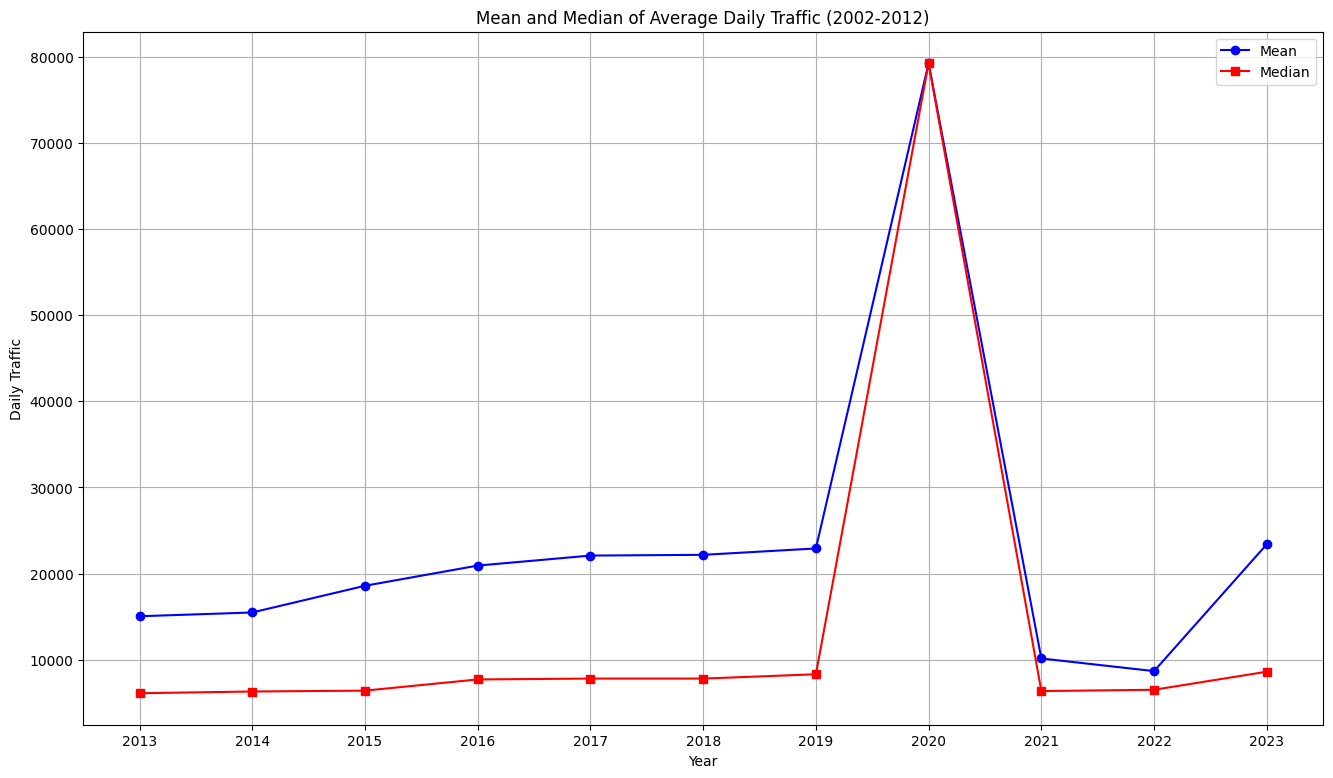

In [51]:
#Plot the mean and median (Second half)
plt.figure(figsize=(16,9))
plt.plot(year[11:], average[11:], label="Mean", color='blue', marker='o')  # Add markers
plt.plot(year[11:], median[11:], label="Median", color='red', marker='s')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Daily Traffic")
plt.title("Mean and Median of Average Daily Traffic (2002-2012)")

# **Force x-axis to show every year**
plt.xticks(year[11:]) # Ensure all years appear

plt.grid(True)  
plt.show()


Distribution Of AADT Values (2002-2023)

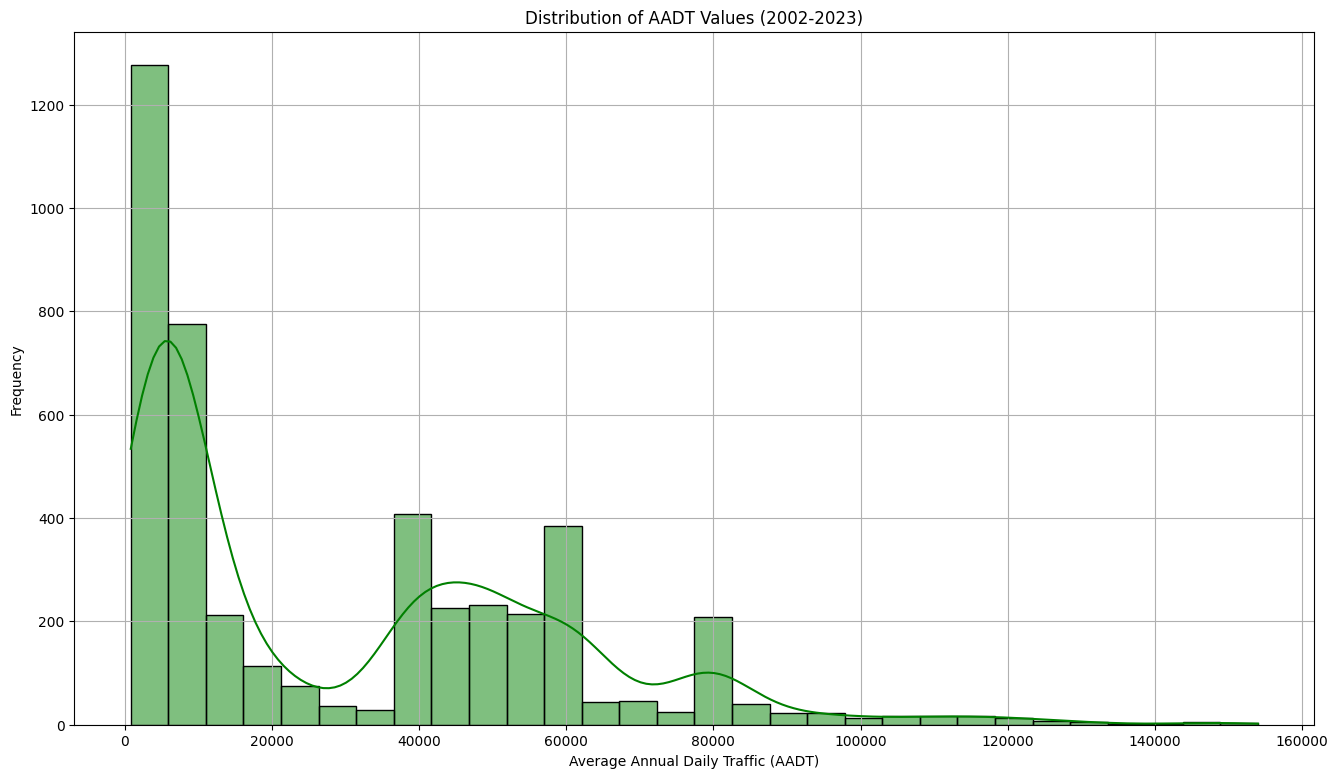

In [54]:
# Melt the data for histogram visualization
df_melted = df.melt(value_vars=value_columns, var_name="Year", value_name="AADT")

# Plot histogram
plt.figure(figsize=(16,9))
sns.histplot(df_melted["AADT"], bins=30, kde=True, color="green", alpha=0.5)

plt.xlabel("Average Annual Daily Traffic (AADT)")
plt.ylabel("Frequency")
plt.title("Distribution of AADT Values (2002-2023)")
plt.grid(True)

plt.show()


Average Volume at each exit


22


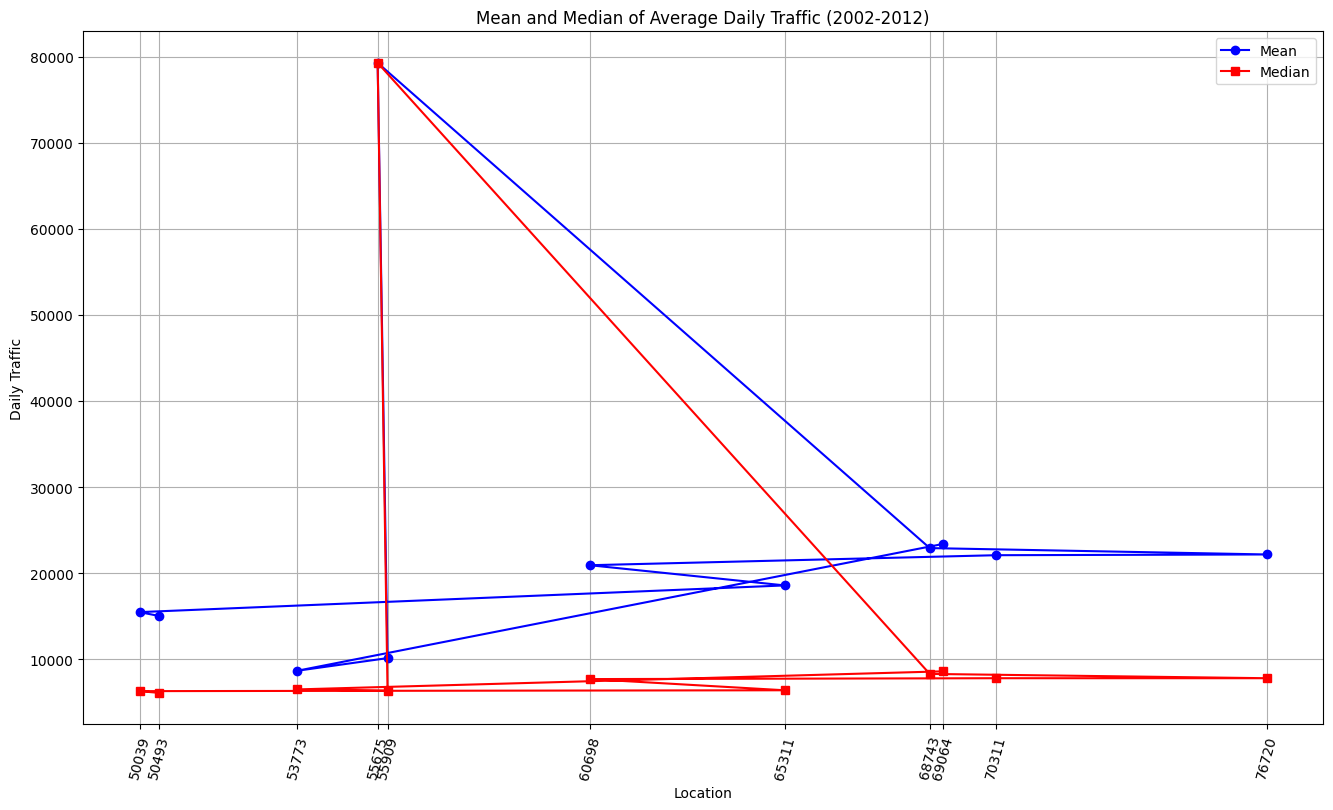

In [74]:


location_avg = [i for i in df[value_columns].mean(axis=1).round(2) if i > 50000]
print(len(location_avg))
plt.figure(figsize=(16,9))
plt.plot(location_avg[11:], average[11:], label="Mean", color='blue', marker='o')  # Add markers
plt.plot(location_avg[11:], median[11:], label="Median", color='red', marker='s')

plt.legend()
plt.xlabel("Location")
plt.ylabel("Daily Traffic")
plt.title("Mean and Median of Average Daily Traffic (2002-2012)")
plt.xticks(rotation=75)

# **Force x-axis to show every year**
plt.xticks(location_avg[11:]) # Ensure all years appear

plt.grid(True)  
plt.show()